In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.special import i0, k0
from math import cos, pi, sqrt

In [2]:
# constants
a1 = 0.5       # internal cylinder radius
a2 = 1         # external cylinder non-wavy radius
M = 100        # Hartmann dimensionless number
beta = 0.5     # Casson number
m = 1.5        # Hall number
b = 0.3        # wave amplitude
eps = b / a2
k2 = M * pow(1 + pow(beta, -1), -1) / (1 + pow(m, 2))      # constant in Bessel's equation
k = sqrt(k2)

# radius equations
r1 = a1 / a2   # internal cylinder constant radius
r2 = lambda z: 1 + eps * cos(2 * pi * z)
r2 = np.vectorize(r2)

In [3]:
def c2(z, dp):
    term_1 = k0(k * r2(z)) - i0(k * r2(z)) * (k0(k * r1) - k0(k * r2(z))) / (i0(k * r1) - i0(k * r2(z)))
    term_1 = pow(term_1, -1)
    term_2 = (dp * (1 + pow(m, 2)) / M) - (i0(k * r2(z)) / (i0(k * r1) - i0(k * r2(z))))
    return term_1 * term_2
c2 = np.vectorize(c2)

def c2c(dp):
    term_1 = k0(k * a2) - i0(k * a2) * (k0(k * r1) - k0(k * a2)) / (i0(k * r1) - i0(k * a2))
    term_2 = dp * (1 + pow(m, 2)) / M - i0(k * a2)
    return term_1 * term_2

In [4]:
def c1(z, dp):
    term_1 = k0(k * r1) - k0(k * r2(z))
    term_2 = i0(k * r1) - i0(k * r2(z))
    return (1 - c2(z, dp) * term_1) / term_2
c1 = np.vectorize(c1)

def c1c(z, dp):
    term_1 = k0(k * r1) - k0(k * a2)
    term_2 = i0(k * r1) - i0(k * a2)
    return 1 - c2c(dp) * term_1 / term_2

In [5]:
def w(r, z, dp):
    #return i0(k * r) + k0(k * r) - ((1 + pow(m, 2)) * dp / M) - 1
    return c1(z, dp) * i0(k * r) + c2(z, dp) * k0(k * r) - ((1 + pow(m, 2)) * dp / M) - 1
    #return c1c(dp) * i0(k * r) + c2c(dp) * k0(k * r) - ((1 + pow(m, 2)) * dp / M) - 1
W = np.vectorize(w)

In [6]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

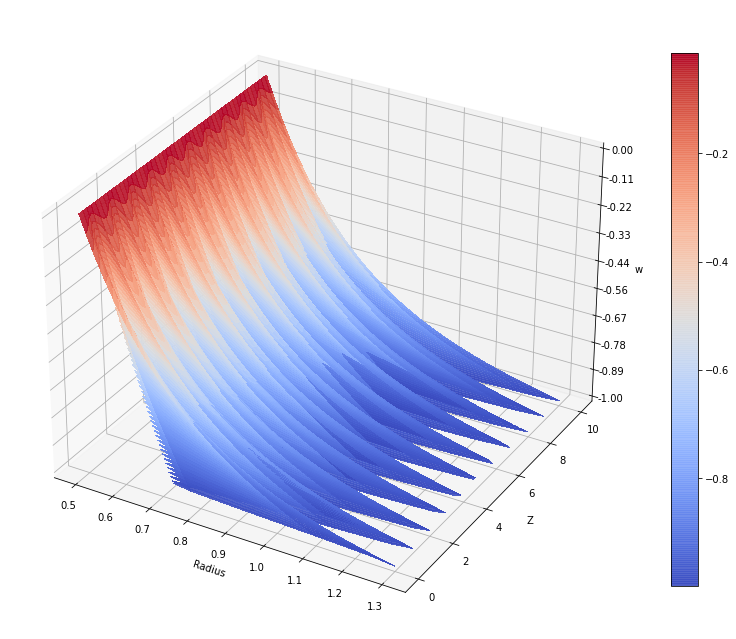

In [7]:
with plt.style.context('fast'):
    fig = plt.figure(figsize=(14,14))
    ax = fig.gca(projection='3d')
    z = np.linspace(0, 10, 100)
    r = np.linspace(r1, r2(z), 100)
    R, Z = np.meshgrid(r, z)
    dp = 0.3
    w1 = w(r, z, dp)
    surf = ax.plot_surface(r, z, w1, cmap=cm.coolwarm, linewidth=0, antialiased=False, alpha=0.9)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    ax.set_xlabel('Radius')
    ax.set_ylabel('Z')
    ax.set_zlabel('w')
    fig.colorbar(surf, shrink=0.7)
    plt.show()

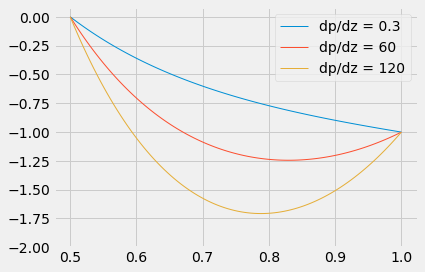

In [9]:
with plt.style.context('fivethirtyeight'):
    z = 0.25
    rz = r2(z)
    r = np.linspace(r1, rz, 100)
    w1 = w(r, z, 0.3) 
    w2 = w(r, z, 60) 
    w3 = w(r, z, 120)
    plt.plot(r, w1, linewidth=1, label='dp/dz = 0.3')
    plt.plot(r, w2, linewidth=1, label='dp/dz = 60')
    plt.plot(r, w3, linewidth=1, label='dp/dz = 120')
    plt.ylim(bottom=-2)
    plt.legend()
    plt.tight_layout()